In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Data.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


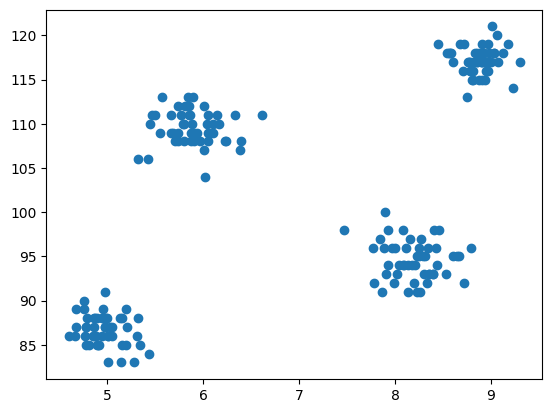

In [4]:
plt.scatter(df['cgpa'],df['iq'])

In [5]:
from sklearn.cluster import KMeans
wcss=[]
# With in cluster sum of squares
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

wcss

[29957.898288,
 4184.14127,
 2503.397581,
 681.96966,
 523.7131894763966,
 405.51209692846834,
 360.5656109104415,
 310.77316082560293,
 208.38688951506788,
 181.22612173754771]

Text(0.5, 1.0, 'Elbow Method')

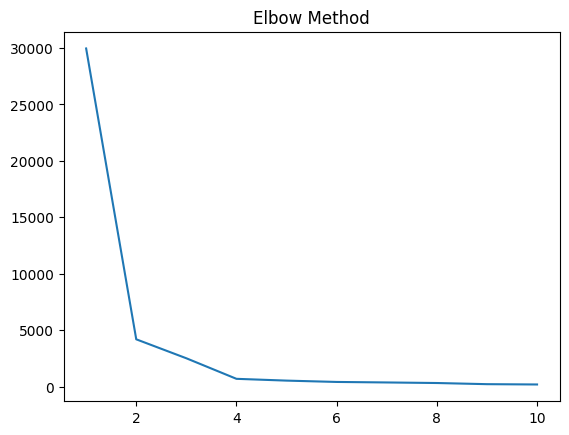

In [6]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')

In [7]:
X=df.iloc[:,:].values
km=KMeans(n_clusters=4)
y_means=km.fit_predict(X)
y_means

array([1, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 0, 3, 1,
       3, 1, 1, 3, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 2, 0, 1, 0, 1, 3, 3, 1,
       2, 2, 3, 0, 2, 0, 1, 1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 3, 3, 2, 1, 2,
       3, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 2, 1, 3, 3, 2, 0, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 2, 2,
       3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 3, 1, 3, 0, 1, 3, 3, 0,
       1, 1, 0, 2, 0, 1, 3, 3, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 3, 0, 2, 0, 3, 1, 2, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 3,
       2, 0, 1, 2, 2, 0, 0, 0, 3, 1, 3, 3, 2, 0, 3, 3, 1, 1, 3, 1, 2, 0,
       0, 2], dtype=int32)

In [8]:
X[y_means == 3,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

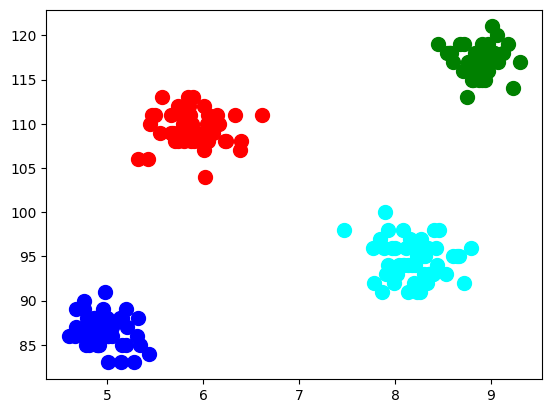

In [9]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],s=100,c='cyan',label='Cluster 4')

<h1>K-Means on 3-D Data

In [10]:
from sklearn.datasets import make_blobs
centroids=[(-5,-5,5),(5,5,5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std=[1,1,1,1]
X,y=make_blobs(n_samples=200,centers=centroids,cluster_std=cluster_std,random_state=1)
X

array([[ 4.33424548,  3.32580419,  5.82502982],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 ,  5.6590498 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848,  4.13221278],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812,  5.417302  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421,  6.11438298],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772,  5.50318481],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [12]:
import plotly.express as px
fig=px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2],color=y)
fig.show()

Text(0.5, 1.0, 'Elbow Method')

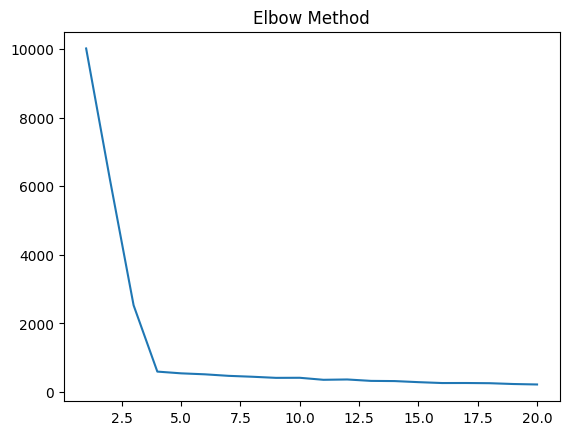

In [14]:
wcss=[]
for i in range(1, 21):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1,21),wcss)
plt.title('Elbow Method')

In [16]:
km=KMeans(n_clusters=4)
y_pred=km.fit_predict(X)

In [18]:
df=pd.DataFrame()
df['x']=X[:,0]
df['y']=X[:,1]
df['z']=X[:,2]
df['lable']=y_pred

In [19]:
fig=px.scatter_3d(df,x='x',y='y',z='z',color='lable')
fig.show()